In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
class kmeans():
    def __init__(self,filename,k=15,iters=100):
        self.k=k
        self.iters=iters
        self.data=np.genfromtxt(filename)
        
        #just a way to add a column for labels
        labels=np.zeros(len(self.data[:,0]))
        self.data=np.column_stack((self.data,labels))
        #it's easier to perform some things on pandas'array
        self.data=pd.DataFrame(self.data)
        self.data.columns=["x","y","label"]
        
        
        x_min, x_max = self.data["x"].min(), self.data["x"].max()
        y_min, y_max = self.data["y"].min(), self.data["y"].max()
    
        self.centroids=np.column_stack((np.random.uniform(x_min, x_max, k),\
                                        np.random.uniform(y_min, y_max, k)))
        
        self.distances=np.zeros((len(self.data["x"]),k))
        
    def display(self):
        color_map = plt.get_cmap('rainbow')
        colors = color_map(self.data["label"] / self.k)
        # zorder is here to avoid covering centroids
        plt.scatter(self.data["x"], self.data["y"], c=colors, s=3, zorder=1)
        plt.scatter(self.centroids[:,0] , self.centroids[:,1] , s = 30, color = "black", zorder=100)      
        plt.axis('off')
        fig = plt.figure(figsize=(10,10))
     
    #we don't need expensive sqrt, square has the same min/max  def get_distances(self):
    def update_distances(self):
        for i in range(self.k):
            self.distances[:,i]=(self.data["x"]-self.centroids[i,0])**2+\
            (self.data["y"]-self.centroids[i,1])**2
    
    def assign_clusters(self):
        self.update_distances()
        self.data["label"]=self.distances.argmin(axis=1)
        
    def update_centroids(self):
        self.centroids=np.array(self.data.groupby(["label"]).mean())
        
    def run(self):
        for i in range(self.iters):
            self.assign_clusters()
            self.update_centroids()
        self.display()
        
  

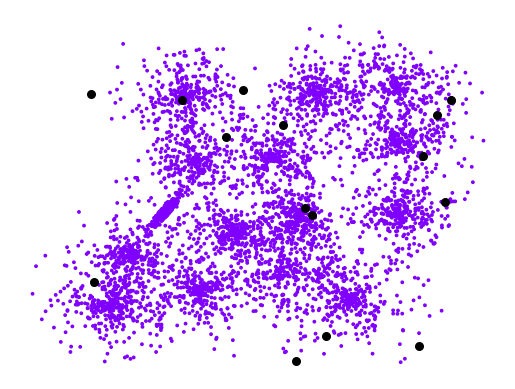

<Figure size 1000x1000 with 0 Axes>

In [3]:
km=kmeans("s3.txt")
km.display()

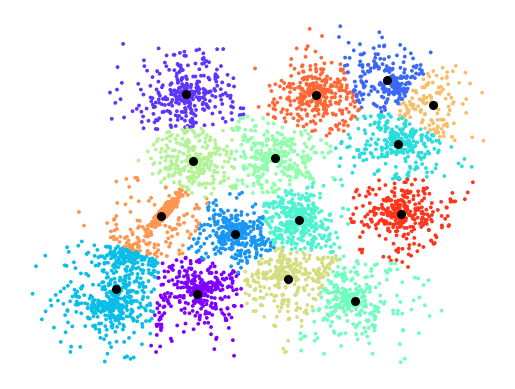

<Figure size 1000x1000 with 0 Axes>

In [4]:
#we have random initialization, so the results somewhat differ each time
#that's the general weakness of the algorithm
km.run()